# Final Observations:

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


## ``Casual users model``

In [48]:
df_casual = pd.read_csv("datos/resultados/2.cas_enc_RF_2.csv", index_col=0)
df_casual.style.background_gradient()

,MAE,MSE,RMSE,R2,set,modelo
0,221.328007,95906.012381,309.686959,0.618829,test,Cas_Cod_Random_Forest_2
1,197.582715,73184.810875,270.526913,0.713257,train,Cas_Cod_Random_Forest_2
2,219.810301,92731.278271,304.518108,0.631447,test,Cas_Cod_Random_Forest_1
3,192.091893,69232.452458,263.120604,0.728743,train,Cas_Cod_Random_Forest_1
4,0.548712,0.574380,0.757879,0.418086,test,Cas_enc_est_3_Decision tree II
5,0.494152,0.466463,0.682981,0.534120,train,Cas_enc_est_3_Decision tree II
6,331.370729,210510.890084,458.814658,0.163341,test,Cas_enc_2_Decision tree II
7,271.696966,137529.542059,370.849757,0.461151,train,Cas_enc_2_Decision tree II
8,248.710180,115775.562086,340.258082,0.539859,test,Cas_enc_Decision tree II
9,253.302844,120989.594521,347.835585,0.525955,train,Cas_enc_Decision tree II


Observamos que el modelo con mejores métricas para los usuarios casuales es el modelo de Random Forest 1 con los datos codificados y con la columna holiday_num; con un RMSE del test de 304 y un R2 de 63%.

In [49]:
df_cas_imp = pd.read_csv("datos/resultados/3.cas_importancia.csv", index_col=0).reset_index(drop=True)
df_cas_imp

,predictor,importancia
0,atemp,0.326917
1,seasons,0.128947
2,weekday_numweekday_num_0,0.103868
3,hum,0.068319
4,weathersitweathersit_1,0.044911
5,mnthmnth_1,0.043728
6,windspeed,0.042436
7,weekday_numweekday_num_1,0.030498
8,mnthmnth_2,0.025340
9,yryr_0,0.024421


In [50]:
# lo primero que hacemos es crearnos un dataframe con los valores solo chest
year= df_cas_imp.iloc[[9,10]]
year

,predictor,importancia
9,yryr_0,0.024421
10,yryr_1,0.022062


In [52]:
# lo primero que hacemos es crearnos un dataframe con los valores solo chest
month= df_cas_imp.iloc[[5,8,11,13,15,17,23,24,26,27,28,29]]
month

,predictor,importancia
5,mnthmnth_1,0.043728
8,mnthmnth_2,0.025340
11,mnthmnth_12,0.015399
13,mnthmnth_7,0.012156
15,mnthmnth_8,0.010421
17,mnthmnth_11,0.009542
23,mnthmnth_3,0.004057
24,mnthmnth_10,0.003739
26,mnthmnth_4,0.003380
27,mnthmnth_6,0.003227


In [53]:
weekday= df_cas_imp.iloc[[2,7,14,18,21,22,25]]
weekday

,predictor,importancia
2,weekday_numweekday_num_0,0.103868
7,weekday_numweekday_num_1,0.030498
14,weekday_numweekday_num_3,0.010768
18,weekday_numweekday_num_4,0.007656
21,weekday_numweekday_num_2,0.005401
22,weekday_numweekday_num_6,0.004800
25,weekday_numweekday_num_5,0.003569


In [54]:
weatherist= df_cas_imp.iloc[[4,12,16]]
weatherist

,predictor,importancia
4,weathersitweathersit_1,0.044911
12,weathersitweathersit_2,0.014403
16,weathersitweathersit_3,0.009739


In [55]:
holiday= df_cas_imp.iloc[[30,31]]
holiday

,predictor,importancia
30,holiday_numholiday_num_0,0.001093
31,holiday_numholiday_num_1,0.000847


In [56]:
workingday= df_cas_imp.iloc[[19,20]]
workingday

,predictor,importancia
19,workingday_numworkingday_num_1,0.007424
20,workingday_numworkingday_num_0,0.006802


In [57]:
#Eliminamos las columnas del df de predictores
df_cas_imp.drop(year.index, inplace = True)
df_cas_imp.drop(month.index, inplace = True)
df_cas_imp.drop(weekday.index, inplace = True)
df_cas_imp.drop(weatherist.index, inplace = True)
df_cas_imp.drop(holiday.index, inplace = True)
df_cas_imp.drop(workingday.index, inplace = True)

In [58]:
df_cas_imp.reset_index(drop=True)

,predictor,importancia
0,atemp,0.326917
1,seasons,0.128947
2,hum,0.068319
3,windspeed,0.042436


In [59]:
#Agregamos las columnas sumadas al df de preditores
df_cas_imp.loc[4] =  ["year", year["importancia"].sum()]
df_cas_imp.loc[5] =  ["month", month["importancia"].sum()]
df_cas_imp.loc[6] = ["weekday", weekday["importancia"].sum()]
df_cas_imp.loc[7] = ["weatherist", weatherist["importancia"].sum()]
df_cas_imp.loc[8] = ["holiday", holiday["importancia"].sum()]
df_cas_imp.loc[9] = ["workingday", workingday["importancia"].sum()]

In [60]:
df_cas_imp.sort_values(by = "importancia", ascending = False, inplace = True)
df_cas_imp.reset_index(drop=True)

,predictor,importancia
0,atemp,0.326917
1,weekday,0.166559
2,month,0.135120
3,seasons,0.128947
4,weatherist,0.069053
5,hum,0.068319
6,year,0.046483
7,workingday,0.014226
8,holiday,0.001940


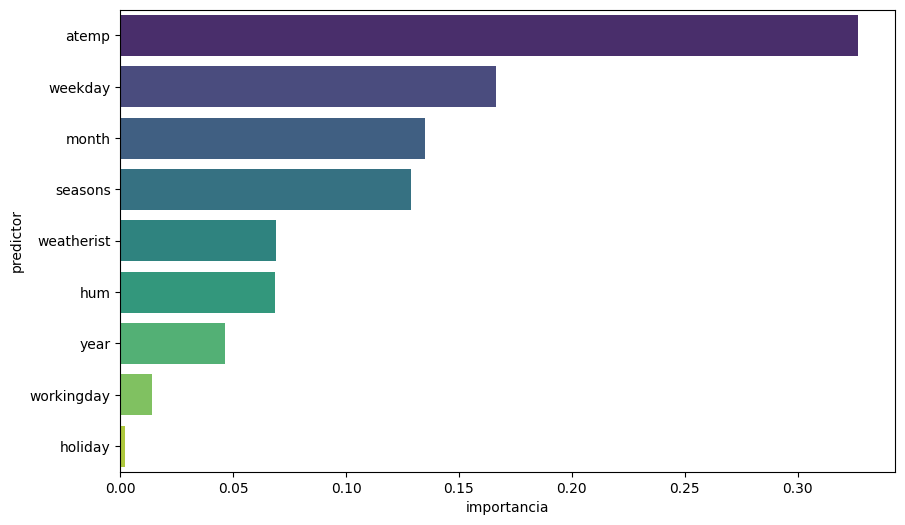

In [61]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = df_cas_imp, palette="viridis");
plt.show()

## ``Registered users model``

In [62]:
df_reg = pd.read_csv("datos/resultados/2.reg_enc_RF_2.csv", index_col=0)
df_reg.style.background_gradient()

,MAE,MSE,RMSE,R2,set,modelo
0,945.566895,1169140.809022,1081.268149,0.458373,test,Reg_Cod_Random_Forest_2
1,832.227310,923021.239776,960.739944,0.629767,train,Reg_Cod_Random_Forest_2
2,449.206380,332243.213700,576.405425,0.846082,test,Reg_Cod_Random_Forest_1
3,412.976721,308100.340579,555.067870,0.876418,train,Reg_Cod_Random_Forest_1
4,0.380791,0.266523,0.516258,0.700023,test,Reg_enc_est_3_Decision tree II
5,0.313225,0.180147,0.424437,0.824447,train,Reg_enc_est_3_Decision tree II
6,1014.973032,1419732.826150,1191.525420,0.342281,test,Reg_enc_2_Decision tree II
7,935.141311,1239350.472096,1113.261188,0.502884,train,Reg_enc_2_Decision tree II
8,549.175471,581592.876273,762.622368,0.730566,test,Reg_enc_Decision tree II
9,480.115576,403152.837697,634.943177,0.838291,train,Reg_enc_Decision tree II


Observamos que el modelo con mejores métricas para los usuarios registrados es el modelo de Random Forest 1 con los datos codificados y con la columna year (yr); con un RMSE del test de 576 y un R2 de 84%.

### ``Importancia de variables``

In [63]:
df_reg_imp = pd.read_csv("datos/resultados/3.3eg_importancia.csv", index_col=0).reset_index(drop=True)
df_reg_imp

,predictor,importancia
0,atemp,0.215176
1,yryr_1,0.193075
2,yryr_0,0.180442
3,seasons,0.138107
4,hum,0.047537
5,mnthmnth_1,0.041067
6,windspeed,0.040072
7,weekday_numweekday_num_0,0.029150
8,mnthmnth_2,0.013873
9,weathersitweathersit_3,0.012678


In [64]:
# lo primero que hacemos es crearnos un dataframe con los valores solo chest
year= df_reg_imp.iloc[[1,2]]
year

,predictor,importancia
1,yryr_1,0.193075
2,yryr_0,0.180442


In [65]:
# lo primero que hacemos es crearnos un dataframe con los valores solo chest
month= df_reg_imp.iloc[[5,8,12,14,15,17,18,24,26,28,30,31]]
month

,predictor,importancia
5,mnthmnth_1,0.041067
8,mnthmnth_2,0.013873
12,mnthmnth_11,0.006291
14,mnthmnth_9,0.005130
15,mnthmnth_3,0.005123
17,mnthmnth_4,0.004712
18,mnthmnth_12,0.004471
24,mnthmnth_10,0.003155
26,mnthmnth_6,0.002237
28,mnthmnth_8,0.001233


In [66]:
weekday= df_reg_imp.iloc[[7,11,16,20,21,27,29]]
weekday

,predictor,importancia
7,weekday_numweekday_num_0,0.029150
11,weekday_numweekday_num_6,0.011171
16,weekday_numweekday_num_1,0.005069
20,weekday_numweekday_num_4,0.003351
21,weekday_numweekday_num_3,0.003284
27,weekday_numweekday_num_5,0.001616
29,weekday_numweekday_num_2,0.001201


In [67]:
weatherist= df_reg_imp.iloc[[9,10,13]]
weatherist

,predictor,importancia
9,weathersitweathersit_3,0.012678
10,weathersitweathersit_1,0.011453
13,weathersitweathersit_2,0.005175


In [68]:
holiday= df_reg_imp.iloc[[19,22]]
holiday

,predictor,importancia
19,holiday_numholiday_num_0,0.003763
22,holiday_numholiday_num_1,0.003211


In [69]:
workingday= df_reg_imp.iloc[[23,25]]
workingday

,predictor,importancia
23,workingday_numworkingday_num_1,0.003180
25,workingday_numworkingday_num_0,0.002529


Las variables más importantes son:
 1. atemp: sensación térmica
 2. year:año
 3. seasons: estación del año


In [70]:
#Eliminamos las columnas del df de predictores
df_reg_imp.drop(year.index, inplace = True)
df_reg_imp.drop(month.index, inplace = True)
df_reg_imp.drop(weekday.index, inplace = True)
df_reg_imp.drop(weatherist.index, inplace = True)
df_reg_imp.drop(holiday.index, inplace = True)
df_reg_imp.drop(workingday.index, inplace = True)

In [71]:
df_reg_imp.reset_index(drop=True)

,predictor,importancia
0,atemp,0.215176
1,seasons,0.138107
2,hum,0.047537
3,windspeed,0.040072


In [72]:
#Agregamos las columnas sumadas al df de preditores
df_reg_imp.loc[4] =  ["year", year["importancia"].sum()]
df_reg_imp.loc[5] =  ["month", month["importancia"].sum()]
df_reg_imp.loc[6] = ["weekday", weekday["importancia"].sum()]
df_reg_imp.loc[7] = ["weatherist", weatherist["importancia"].sum()]
df_reg_imp.loc[8] = ["holiday", holiday["importancia"].sum()]
df_reg_imp.loc[9] = ["workingday", workingday["importancia"].sum()]

In [73]:
df_reg_imp.sort_values(by = "importancia", ascending = False, inplace = True)
df_reg_imp.reset_index(drop=True)

,predictor,importancia
0,year,0.373517
1,atemp,0.215176
2,seasons,0.138107
3,month,0.088757
4,weekday,0.054843
5,weatherist,0.029306
6,holiday,0.006975
7,workingday,0.005710


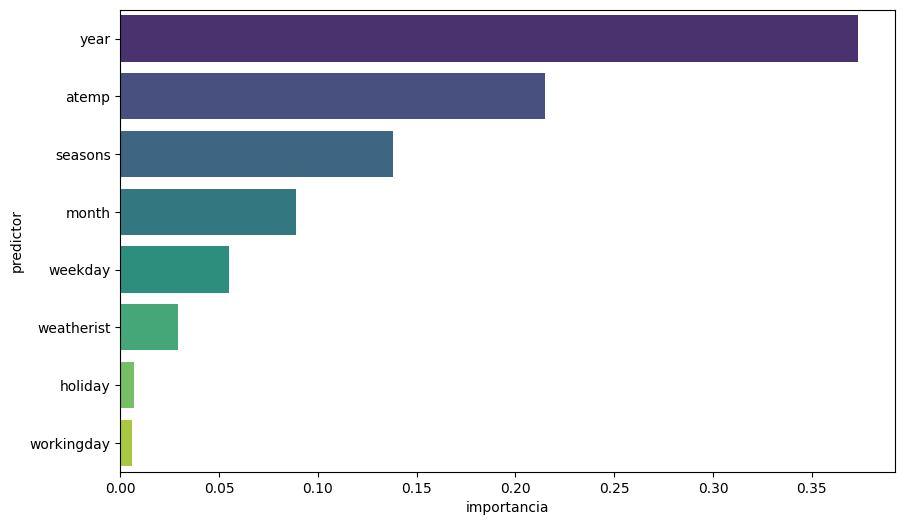

In [74]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = df_reg_imp, palette="viridis");
plt.show()